#  Image Interpolation 

## Requirements

- Python3
- OpenCV
- Numpy
- Matplotlib

## Importing required Libraries

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg

## Load image from drive and shows the original image.

### **imshow**: 
Function that handles both rgb and grayscale image and shows them accordingly.

*Parameters*: 
- **img**: input img

*Return*: None

(500, 500, 3)
(500, 500, 3)
(500, 500, 3)
(500, 500, 3)


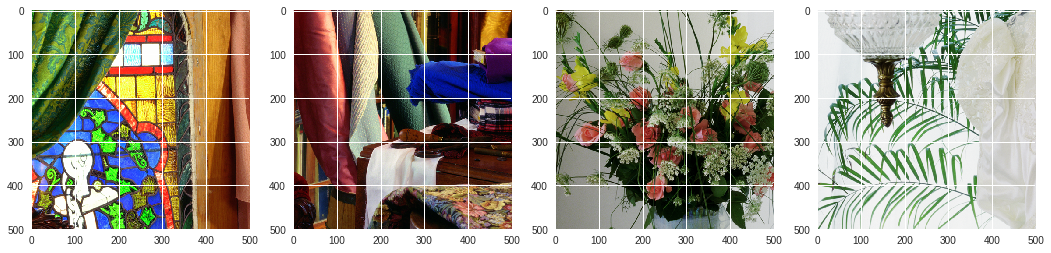

In [72]:
img = []

img.append(mpimg.imread("1.tif") )
img.append(mpimg.imread("2.tif") )
img.append(mpimg.imread("3.tif") )
img.append(mpimg.imread("4.tif") )

def imshow(im):
    if len(im.shape) < 3:
        plt.imshow(im, cmap="gray")
    elif im.shape[2] == 1:
        plt.imshow(np.resize(im,(im.shape[0],im.shape[1])), cmap="gray")
    else:
        plt.imshow(im)

for im in img:
    if len(im.shape) < 3:
        im.resize(*im.shape,1)

fig = plt.figure(1, figsize=(18, 16))
for i in range(len(outImage)):
    splot = plt.subplot(141+i)
    print(img[i].shape)
    imshow(img[i])
plt.show()

In [0]:
def conv(image, filter):
    iw,ih,id = image.shape
    
    fw,fh = filter.shape    
    out = np.zeros((iw-fw+1,ih-fh+1,id))
    
    for d in range(id):
        for w in range(ih-fh+1):
            for h in range(iw-fw+1):
                out[w,h,d] = np.sum(filter*image[w:w+fh , h:h+fw , d])
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)


## Bilateral Filter

### bfunc:

Function that create Bilateral Filter according to image portion and give pixel value after applying it to image part

*Parameters*: 

- **i,j**: pixel value for which bilateral filter will be applied
- **fw,fh**: Filter width and filter height
- **image**: input image on which pixel (i,j) exist
-  **sigma1, sigma2**:  bilateral function parameters
- **bilaterealWFilter**: weighted bilateral Filteral


### bilateralFilterConv:

Function that apply convolution on given image with the bilateral filter of given size

*Parameters*:

- **image**: input image on which bilateral filter will be applied
- **fw,fh**: widht and height if bilateral filter

*Return*:

- returns a bilateral filtered image (2d/3d matrix)



In [0]:
# bilateral filter

def bfunc(i,j,fw,fh,image,sigma1, sigma2, bilateralWFilter):
  
    imgwork = image[i - fh//2:i+1 + fh//2, j - fw//2:j+1 + fw//2, :]
    bilateralIFilter = ((imgwork - image[i, j,:])**2 )/(2*(sigma1**2))
    
    bilateralFilter = np.exp(-1*bilateralIFilter)*bilateralWFilter
    bilateralFilter = bilateralFilter/np.sum(bilateralFilter,axis=(0,1))
    return np.sum(np.multiply(imgwork, bilateralFilter),axis=(0,1))

def bilateralFilterConv(image, fw,fh):
    size = image.shape
    sigma1 = 40
    sigma2 = 40
    bilateral1 = 2*3.14*sigma2*sigma2*gaussFilter((fw,fh), sigma2)
    if len(image.shape) < 3  or image.shape[2] == 1:
        bilateralWFilter = np.resize(bilateral1,(*bilateral1.shape,1))
    else:
        bilateralWFilter = np.stack([bilateral1, bilateral1, bilateral1], axis=2)
    
    out = np.zeros((size[0],size[1],size[2]))
    for i in range(size[0]-2*fh +1):
        for j in range(size[1]-2*fw +1):
            out[fh+i,fw+j,:] = bfunc(i+fw-1, j+fh-1, fw, fh, image, sigma1, sigma2, bilateralWFilter)
    
    out[:fh,:,:] = out[fh,:,:]
    out[size[0]+fh:,:,:] = out[size[0]-fh,:,:]
    out[:fw,:,:] = out[fw,:,:]
    out[size[1]+fw:,:,:] = out[size[1]-fw,:,:]
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)


# Appying InterPolation to Images Using Bilateral Filter

In [0]:
def interpolate(image):
    iw, ih, id = image.shape
    out = np.zeros((2*iw, 2*ih, id), dtype=np.uint8)
    for d in range(id):
        for i in range(ih):
            for j in range(iw):
                out[2*i,2*j,d] = image[i,j,d]

    for d in range(id):
        for i in range(2*ih):
            for j in range(2*iw):
                if (i%2 == 0 and j%2 == 0) or np.count_nonzero(out[i-1:i+2,j-1:j+2,d]) == 0:
                    continue
                out[i, j, d] = np.sum(out[i-1:i+2,j-1:j+2,d])//np.count_nonzero(out[i-1:i+2,j-1:j+2,d] != 0)
                
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

outImage = []

for i in range(len(img)):
    outImage.append(interpolate(img[i]))
    plt.figure(i+1)

(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)


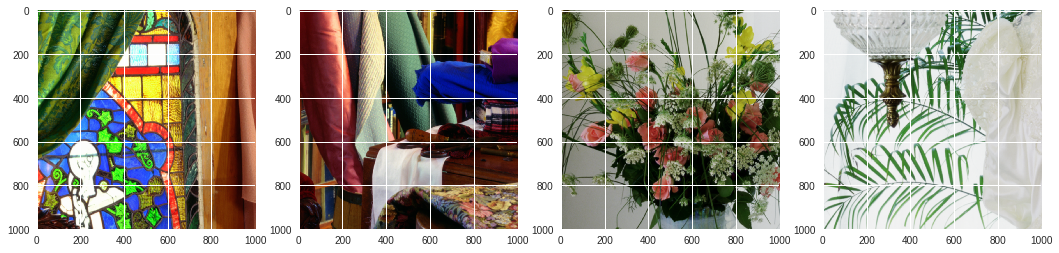

In [76]:
fig = plt.figure(1, figsize=(18, 16))

bifilterOut = []

for i in range(len(outImage)):
    splot = plt.subplot(141+i)
    bifilterOut.append(bilateralFilterConv(outImage[i],3,3))
    print(bifilterOut[i].shape)
    imshow(bifilterOut[i])
    plt.imsave(str(i)+"_out.tif", bifilterOut[i])
plt.show()